In [1]:

import osmnx as ox

ox.citation()

@article{boeing_osmnx_2017,
    title = {{OSMnx}: {New} {Methods} for {Acquiring}, {Constructing}, {Analyzing}, and {Visualizing} {Complex} {Street} {Networks}},
    volume = {65},
    doi = {10.1016/j.compenvurbsys.2017.05.004},
    number = {126-139},
    journal = {Computers, Environment and Urban Systems},
    author = {Boeing, Geoff},
    year = {2017},
    pages = {126--139}
}


In [2]:
# NB! Only run this once
%cd ..
%load_ext autoreload
%autoreload 2

C:\Users\emily\Documents\repos\south-africa-street-history-mapping


C:\Users\emily\AppData\Local\pypoetry\Cache\virtualenvs\south-africa-street-history-mapping-9G5Ofpoj-py3.10\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

In [4]:
from utils.country_colour_map import get_colour, get_custom_legend, ORIGIN_CMAP, DEFAULT_BACKGROUND_COLOUR
from utils.lookup_origin import map_street_to_origin

# Kensington

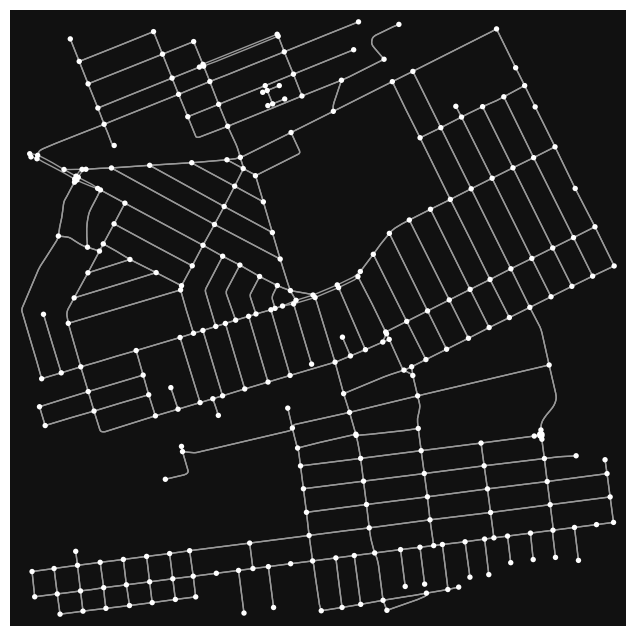

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [5]:
kensington_graph = ox.graph_from_address('Kensington, City of Johannesburg, South Africa', network_type="drive")
ox.plot_graph(kensington_graph)

In [6]:
kensington_gdf = ox.graph_to_gdfs(kensington_graph, nodes=False)
print(len(kensington_gdf))
kensington_gdf.head()

814


osmid                   name       highway  \
u         v          key                                                   
26417796  6836712337 0    729836408             8th Street  unclassified   
          305727377  0    620394563  Albertina Sisulu Road       primary   
          305727363  0    720130032             8th Street   residential   
109195195 452865568  0     12070124       Langermann Drive     secondary   
          390034769  0     12070124       Langermann Drive     secondary   

                          oneway  reversed   length lanes  ref maxspeed  \
u         v          key                                                  
26417796  6836712337 0     False     False    6.515   NaN  NaN      NaN   
          305727377  0      True     False  270.066     3  R24       60   
          305727363  0     False      True   83.026     2  NaN      NaN   
109195195 452865568  0     False     False   77.678     4  R22      NaN   
          390034769  0     False      True   80.789     4  R22      NaN   

                                                                   geometry  \
u         v          key                                                      
26417796  6836712337 0    LINESTRING (28.09293 -26.18843, 28.09295 -26.1...   
          305727377  0    LINESTRING (28.09293 -26.18843, 28.09302 -26.1...   
          305727363  0    LINESTRING (28.09293 -26.18843, 28.09277 -26.1...   
109195195 452865568  0    LINESTRING (28.10410 -26.19126, 28.10340 -26.1...   
          390034769  0    LINESTRING (28.10410 -26.19126, 28.10482 -26.1...   

                         junction  
u         v          key           
26417796  6836712337 0        NaN  
          305727377  0        NaN  
          305727363  0        NaN  
109195195 452865568  0        NaN  
          390034769  0        NaN

In [7]:
kensington_gdf = kensington_gdf.apply(lambda x: map_street_to_origin(x), axis=1)
kensington_gdf

geometry  \
u           v           key                                                      
26417796    6836712337  0    LINESTRING (28.09293 -26.18843, 28.09295 -26.1...   
            305727377   0    LINESTRING (28.09293 -26.18843, 28.09302 -26.1...   
            305727363   0    LINESTRING (28.09293 -26.18843, 28.09277 -26.1...   
109195195   452865568   0    LINESTRING (28.10410 -26.19126, 28.10340 -26.1...   
            390034769   0    LINESTRING (28.10410 -26.19126, 28.10482 -26.1...   
...                                                                        ...   
8703883107  403163821   0    LINESTRING (28.08863 -26.20320, 28.08869 -26.2...   
10956601309 10956601310 0    LINESTRING (28.09764 -26.19670, 28.09791 -26.1...   
10956601310 390371867   0    LINESTRING (28.09791 -26.19727, 28.09842 -26.1...   
            10956601309 0    LINESTRING (28.09791 -26.19727, 28.09764 -26.1...   
            390036534   0    LINESTRING (28.09791 -26.19727, 28.09749 -26.1...   

                                  highway junction lanes   length maxspeed  \
u           v           key                                                  
26417796    6836712337  0    unclassified      NaN   NaN    6.515      NaN   
            305727377   0         primary      NaN     3  270.066       60   
            305727363   0     residential      NaN     2   83.026      NaN   
109195195   452865568   0       secondary      NaN     4   77.678      NaN   
            390034769   0       secondary      NaN     4   80.789      NaN   
...                                   ...      ...   ...      ...      ...   
8703883107  403163821   0     residential      NaN   NaN   47.474      NaN   
10956601309 10956601310 0     residential      NaN   NaN   68.806      NaN   
10956601310 390371867   0     residential      NaN     2   54.698      NaN   
            10956601309 0     residential      NaN   NaN   68.806      NaN   
            390036534   0     residential      NaN     2   56.042      NaN   

                                              name  oneway        origin  \
u           v           key                                                
26417796    6836712337  0               8th Street   False          None   
            305727377   0    Albertina Sisulu Road    True  south_africa   
            305727363   0               8th Street   False          None   
109195195   452865568   0         Langermann Drive   False  south_africa   
            390034769   0         Langermann Drive   False  south_africa   
...                                            ...     ...           ...   
8703883107  403163821   0                      NaN   False           NaN   
10956601309 10956601310 0                      NaN   False           NaN   
10956601310 390371867   0              Ernest Road   False        france   
            10956601309 0                      NaN   False           NaN   
            390036534   0              Ernest Road   False        france   

                                  osmid  ref  reversed  
u           v           key                             
26417796    6836712337  0     729836408  NaN     False  
            305727377   0     620394563  R24     False  
            305727363   0     720130032  NaN      True  
109195195   452865568   0      12070124  R22     False  
            390034769   0      12070124  R22      True  
...                                 ...  ...       ...  
8703883107  403163821   0     939640345  NaN     False  
10956601309 10956601310 0    1179649581  NaN      True  
10956601310 390371867   0      34036038  NaN      True  
            10956601309 0    1179649581  NaN     False  
            390036534   0      34036038  NaN     False  

[814 rows x 12 columns]

In [8]:
kensington_gdf[kensington_gdf["origin"].isna()]

geometry  \
u           v           key                                                      
26417796    6836712337  0    LINESTRING (28.09293 -26.18843, 28.09295 -26.1...   
            305727363   0    LINESTRING (28.09293 -26.18843, 28.09277 -26.1...   
288928761   305730228   0    LINESTRING (28.09627 -26.18939, 28.09761 -26.1...   
            288929518   0    LINESTRING (28.09627 -26.18939, 28.09376 -26.1...   
            305727368   0    LINESTRING (28.09627 -26.18939, 28.09598 -26.1...   
...                                                                        ...   
8703623648  8703623647  0    LINESTRING (28.09528 -26.18963, 28.09512 -26.1...   
            8703623645  0    LINESTRING (28.09528 -26.18963, 28.09510 -26.1...   
8703883107  403163821   0    LINESTRING (28.08863 -26.20320, 28.08869 -26.2...   
10956601309 10956601310 0    LINESTRING (28.09764 -26.19670, 28.09791 -26.1...   
10956601310 10956601309 0    LINESTRING (28.09791 -26.19727, 28.09764 -26.1...   

                                  highway junction lanes   length maxspeed  \
u           v           key                                                  
26417796    6836712337  0    unclassified      NaN   NaN    6.515      NaN   
            305727363   0     residential      NaN     2   83.026      NaN   
288928761   305730228   0     residential      NaN     2  143.428      NaN   
            288929518   0     residential      NaN     2  270.461      NaN   
            305727368   0     residential      NaN     2   78.997      NaN   
...                                   ...      ...   ...      ...      ...   
8703623648  8703623647  0     residential      NaN   NaN   17.108      NaN   
            8703623645  0     residential      NaN   NaN   48.656      NaN   
8703883107  403163821   0     residential      NaN   NaN   47.474      NaN   
10956601309 10956601310 0     residential      NaN   NaN   68.806      NaN   
10956601310 10956601309 0     residential      NaN   NaN   68.806      NaN   

                                    name  oneway origin       osmid  ref  \
u           v           key                                                
26417796    6836712337  0     8th Street   False   None   729836408  NaN   
            305727363   0     8th Street   False   None   720130032  NaN   
288928761   305730228   0    11th Avenue   False   None    53746380  NaN   
            288929518   0    11th Avenue   False   None    53746380  NaN   
            305727368   0     9th Street   False   None   620394564  NaN   
...                                  ...     ...    ...         ...  ...   
8703623648  8703623647  0            NaN   False    NaN   939607527  NaN   
            8703623645  0            NaN   False    NaN   939607527  NaN   
8703883107  403163821   0            NaN   False    NaN   939640345  NaN   
10956601309 10956601310 0            NaN   False    NaN  1179649581  NaN   
10956601310 10956601309 0            NaN   False    NaN  1179649581  NaN   

                             reversed  
u           v           key            
26417796    6836712337  0       False  
            305727363   0        True  
288928761   305730228   0       False  
            288929518   0        True  
            305727368   0        True  
...                               ...  
8703623648  8703623647  0       False  
            8703623645  0        True  
8703883107  403163821   0       False  
10956601309 10956601310 0        True  
10956601310 10956601309 0       False  

[137 rows x 12 columns]

In [9]:
# get the color for each edge based on its highway type
kensington_gdf["colour"] = kensington_gdf.apply(lambda x: get_colour(x["origin"]), axis=1)
kensington_gdf

geometry  \
u           v           key                                                      
26417796    6836712337  0    LINESTRING (28.09293 -26.18843, 28.09295 -26.1...   
            305727377   0    LINESTRING (28.09293 -26.18843, 28.09302 -26.1...   
            305727363   0    LINESTRING (28.09293 -26.18843, 28.09277 -26.1...   
109195195   452865568   0    LINESTRING (28.10410 -26.19126, 28.10340 -26.1...   
            390034769   0    LINESTRING (28.10410 -26.19126, 28.10482 -26.1...   
...                                                                        ...   
8703883107  403163821   0    LINESTRING (28.08863 -26.20320, 28.08869 -26.2...   
10956601309 10956601310 0    LINESTRING (28.09764 -26.19670, 28.09791 -26.1...   
10956601310 390371867   0    LINESTRING (28.09791 -26.19727, 28.09842 -26.1...   
            10956601309 0    LINESTRING (28.09791 -26.19727, 28.09764 -26.1...   
            390036534   0    LINESTRING (28.09791 -26.19727, 28.09749 -26.1...   

                                  highway junction lanes   length maxspeed  \
u           v           key                                                  
26417796    6836712337  0    unclassified      NaN   NaN    6.515      NaN   
            305727377   0         primary      NaN     3  270.066       60   
            305727363   0     residential      NaN     2   83.026      NaN   
109195195   452865568   0       secondary      NaN     4   77.678      NaN   
            390034769   0       secondary      NaN     4   80.789      NaN   
...                                   ...      ...   ...      ...      ...   
8703883107  403163821   0     residential      NaN   NaN   47.474      NaN   
10956601309 10956601310 0     residential      NaN   NaN   68.806      NaN   
10956601310 390371867   0     residential      NaN     2   54.698      NaN   
            10956601309 0     residential      NaN   NaN   68.806      NaN   
            390036534   0     residential      NaN     2   56.042      NaN   

                                              name  oneway        origin  \
u           v           key                                                
26417796    6836712337  0               8th Street   False          None   
            305727377   0    Albertina Sisulu Road    True  south_africa   
            305727363   0               8th Street   False          None   
109195195   452865568   0         Langermann Drive   False  south_africa   
            390034769   0         Langermann Drive   False  south_africa   
...                                            ...     ...           ...   
8703883107  403163821   0                      NaN   False           NaN   
10956601309 10956601310 0                      NaN   False           NaN   
10956601310 390371867   0              Ernest Road   False        france   
            10956601309 0                      NaN   False           NaN   
            390036534   0              Ernest Road   False        france   

                                  osmid  ref  reversed  \
u           v           key                              
26417796    6836712337  0     729836408  NaN     False   
            305727377   0     620394563  R24     False   
            305727363   0     720130032  NaN      True   
109195195   452865568   0      12070124  R22     False   
            390034769   0      12070124  R22      True   
...                                 ...  ...       ...   
8703883107  403163821   0     939640345  NaN     False   
10956601309 10956601310 0    1179649581  NaN      True   
10956601310 390371867   0      34036038  NaN      True   
            10956601309 0    1179649581  NaN     False   
            390036534   0      34036038  NaN     False   

                                                                        colour  
u           v           key                                                     
26417796    6836712337  0    (0.8509803921568627, 0.8509803921568627, 0.850...  
 

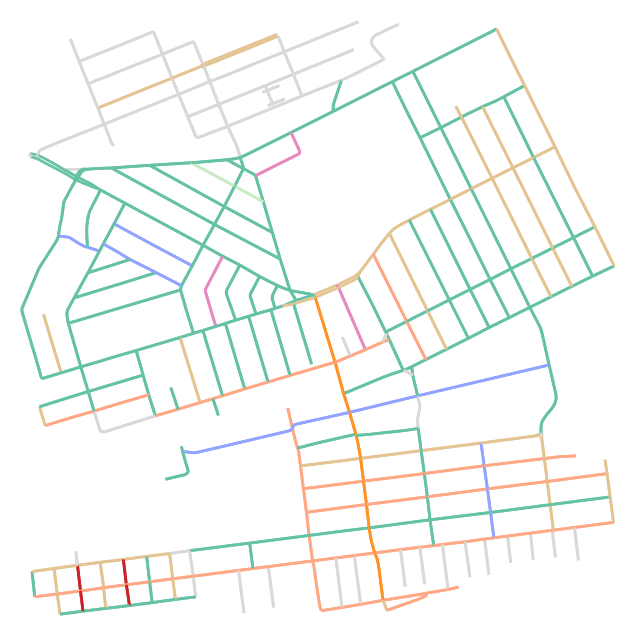

In [10]:
#Plot 
map_fig, map_ax = ox.plot_graph(kensington_graph, node_size=0,
                                dpi=100, bgcolor=DEFAULT_BACKGROUND_COLOUR,
                                save=False, edge_color=kensington_gdf["colour"],
                                edge_linewidth=2, edge_alpha=1)
# Can add show=False later 

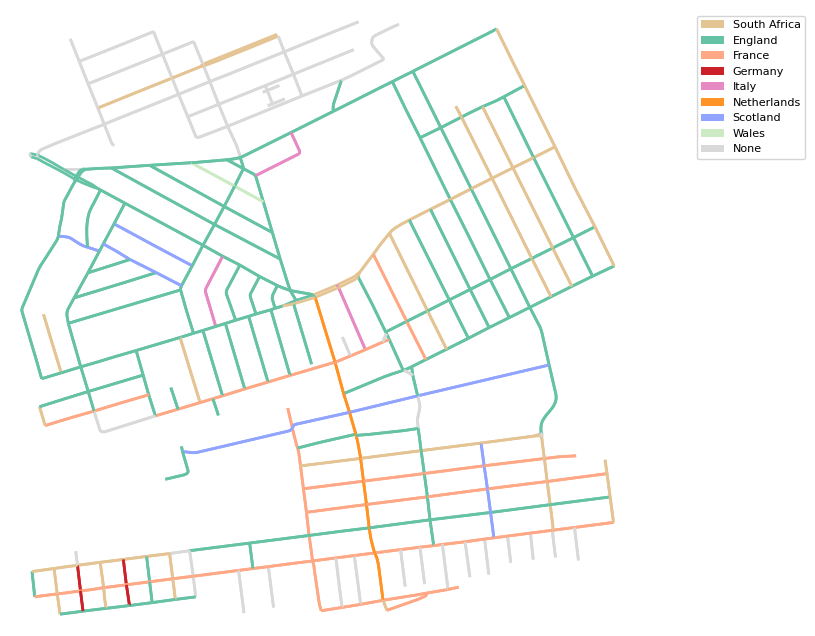

In [11]:
# Custom legend
kensington_origins_in_fig = kensington_gdf["origin"].unique()

kensington_legend_elements = get_custom_legend(kensington_origins_in_fig)

map_ax.legend(handles=kensington_legend_elements, bbox_to_anchor=(1.3, 1), fontsize=8)
map_fig

In [12]:
map_fig.savefig("./output/images/kensington-address-custom-cmap.png", dpi=300, bbox_inches='tight', format="png",
                facecolor=map_fig.get_facecolor(), transparent=False)

In [13]:
kensington_gdf.explore(column="origin", color=lambda x: get_colour(x))


# Soweto

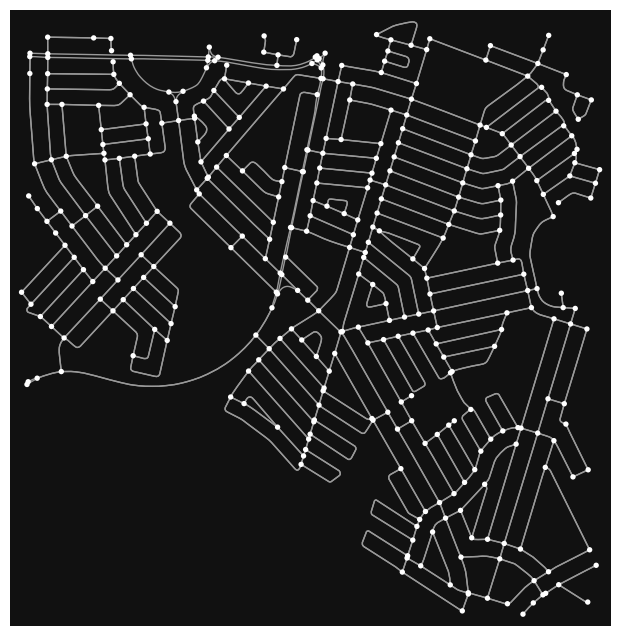

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [206]:
soweto_graph = ox.graph_from_address('Soweto, South Africa', network_type="drive")
ox.plot_graph(soweto_graph)

In [207]:
soweto_gdf = ox.graph_to_gdfs(soweto_graph, nodes=False)
print(len(soweto_gdf))
soweto_gdf.head()

1021


osmid lanes  ref          name  \
u         v          key                                                    
300359230 300359234  0                 323860859     2  M70  Vincent Road   
          5838585226 0    [754548064, 617658176]     1  M70  Vincent Road   
300359234 590065088  0                 617021093   NaN  NaN           NaN   
          300359250  0                 323860859     2  M70  Vincent Road   
          300359230  0                 323860859     2  M70  Vincent Road   

                               highway  oneway reversed   length  \
u         v          key                                           
300359230 300359234  0       secondary   False    False  109.238   
          5838585226 0       secondary    True    False   55.961   
300359234 590065088  0    unclassified   False    False   65.702   
          300359250  0       secondary   False    False  731.609   
          300359230  0       secondary   False     True  109.238   

                                                                   geometry  \
u         v          key                                                      
300359230 300359234  0    LINESTRING (27.88871 -26.22225, 27.88863 -26.2...   
          5838585226 0    LINESTRING (27.88871 -26.22225, 27.88875 -26.2...   
300359234 590065088  0    LINESTRING (27.88815 -26.22310, 27.88861 -26.2...   
          300359250  0    LINESTRING (27.88815 -26.22310, 27.88797 -26.2...   
          300359230  0    LINESTRING (27.88815 -26.22310, 27.88831 -26.2...   

                         bridge maxspeed  
u         v          key                  
300359230 300359234  0      NaN      NaN  
          5838585226 0      NaN      NaN  
300359234 590065088  0      NaN      NaN  
          300359250  0      NaN      NaN  
          300359230  0      NaN      NaN

In [209]:
soweto_gdf = soweto_gdf.apply(lambda x: map_street_to_origin(x), axis=1)
soweto_gdf

bridge  \
u          v          key          
300359230  300359234  0      NaN   
           5838585226 0      NaN   
300359234  590065088  0      NaN   
           300359250  0      NaN   
           300359230  0      NaN   
...                          ...   
7049815182 590065151  0      NaN   
7787389822 7049529751 0      NaN   
8031770177 1182057594 0      NaN   
           590065128  0      NaN   
           5835165863 0      NaN   

                                                                    geometry  \
u          v          key                                                      
300359230  300359234  0    LINESTRING (27.88871 -26.22225, 27.88863 -26.2...   
           5838585226 0    LINESTRING (27.88871 -26.22225, 27.88875 -26.2...   
300359234  590065088  0    LINESTRING (27.88815 -26.22310, 27.88861 -26.2...   
           300359250  0    LINESTRING (27.88815 -26.22310, 27.88797 -26.2...   
           300359230  0    LINESTRING (27.88815 -26.22310, 27.88831 -26.2...   
...                                                                      ...   
7049815182 590065151  0    LINESTRING (27.89114 -26.22299, 27.89116 -26.2...   
7787389822 7049529751 0    LINESTRING (27.89802 -26.21542, 27.89821 -26.2...   
8031770177 1182057594 0    LINESTRING (27.89488 -26.22427, 27.89493 -26.2...   
           590065128  0    LINESTRING (27.89488 -26.22427, 27.89471 -26.2...   
           5835165863 0    LINESTRING (27.89488 -26.22427, 27.89497 -26.2...   

                                highway lanes   length maxspeed  \
u          v          key                                         
300359230  300359234  0       secondary     2  109.238      NaN   
           5838585226 0       secondary     1   55.961      NaN   
300359234  590065088  0    unclassified   NaN   65.702      NaN   
           300359250  0       secondary     2  731.609      NaN   
           300359230  0       secondary     2  109.238      NaN   
...                                 ...   ...      ...      ...   
7049815182 590065151  0        tertiary     2  205.764      NaN   
7787389822 7049529751 0     residential   NaN   53.230      NaN   
8031770177 1182057594 0     residential   NaN    6.926      NaN   
           590065128  0     residential   NaN  225.842      NaN   
           5835165863 0    unclassified   NaN  146.359      NaN   

                                                       name  oneway  \
u          v          key                                             
300359230  300359234  0                        Vincent Road   False   
           5838585226 0                        Vincent Road    True   
300359234  590065088  0                                 NaN   False   
           300359250  0                        Vincent Road   False   
           300359230  0                        Vincent Road   False   
...                                                     ...     ...   
7049815182 590065151  0                          Heald Road   False   
7787389822 7049529751 0                                 NaN   False   
8031770177 1182057594 0                     Ingotshe Street   False   
           590065128  0    [Indoni Street, Ingotshe Street]   False   
           5835165863 0                                 NaN   False   

                                 origin                   osmid  ref reversed  
u          v          key                                                      
300359230  300359234  0          france               323860859  M70    False  
           5838585226 0          france  [754548064, 617658176]  M70    False  
300359234  590065088  0             NaN               617021093  NaN    False  
           300359250  0          france               323860859  M70    False  
           300359230  0          france               323860859  M70     True  
...                                 ...                     ...  ...      ...  
7049815182 590065151  0         england               605807158  NaN     True  


In [211]:
soweto_gdf[soweto_gdf["origin"].isna()]

bridge  \
u          v          key          
300359234  590065088  0      NaN   
590064969  590064989  0      NaN   
           590064972  0      NaN   
           590064971  0      NaN   
590064971  590064982  0      NaN   
...                          ...   
7049529751 7787389822 0      NaN   
7049529877 6708169788 0      NaN   
7787389822 7049529751 0      NaN   
8031770177 590065128  0      NaN   
           5835165863 0      NaN   

                                                                    geometry  \
u          v          key                                                      
300359234  590065088  0    LINESTRING (27.88815 -26.22310, 27.88861 -26.2...   
590064969  590064989  0    LINESTRING (27.88071 -26.22252, 27.88220 -26.2...   
           590064972  0    LINESTRING (27.88071 -26.22252, 27.88039 -26.2...   
           590064971  0    LINESTRING (27.88071 -26.22252, 27.88082 -26.2...   
590064971  590064982  0    LINESTRING (27.88110 -26.22283, 27.88252 -26.2...   
...                                                                      ...   
7049529751 7787389822 0    LINESTRING (27.89826 -26.21583, 27.89827 -26.2...   
7049529877 6708169788 0    LINESTRING (27.89017 -26.22573, 27.89158 -26.2...   
7787389822 7049529751 0    LINESTRING (27.89802 -26.21542, 27.89821 -26.2...   
8031770177 590065128  0    LINESTRING (27.89488 -26.22427, 27.89471 -26.2...   
           5835165863 0    LINESTRING (27.89488 -26.22427, 27.89497 -26.2...   

                                highway lanes   length maxspeed  \
u          v          key                                         
300359234  590065088  0    unclassified   NaN   65.702      NaN   
590064969  590064989  0     residential   NaN  219.324      NaN   
           590064972  0     residential   NaN   78.627      NaN   
           590064971  0     residential   NaN   51.421      NaN   
590064971  590064982  0     residential   NaN  210.143      NaN   
...                                 ...   ...      ...      ...   
7049529751 7787389822 0     residential   NaN   53.230      NaN   
7049529877 6708169788 0     residential   NaN  381.641      NaN   
7787389822 7049529751 0     residential   NaN   53.230      NaN   
8031770177 590065128  0     residential   NaN  225.842      NaN   
           5835165863 0    unclassified   NaN  146.359      NaN   

                                                                        name  \
u          v          key                                                      
300359234  590065088  0                                                  NaN   
590064969  590064989  0                                                  NaN   
           590064972  0                                                  NaN   
           590064971  0                                                  NaN   
590064971  590064982  0                                                  NaN   
...                                                                      ...   
7049529751 7787389822 0                                                  NaN   
7049529877 6708169788 0    [Mpfumo Street, Tsakani Street, Tshinavheni St...   
7787389822 7049529751 0                                                  NaN   
8031770177 590065128  0                     [Indoni Street, Ingotshe Street]   
           5835165863 0                                                  NaN   

                           oneway origin                            osmid  \
u          v          key                                                   
300359234  590065088  0     False    NaN                        617021093   
590064969  590064989  0     False    NaN                         46249603   
           590064972  0     False    NaN                         46249486   
           590064971  0     False    NaN                         46249486   
590064971  590064982  0     False    NaN                         46249477   
...                           ...    ...                        

In [309]:
# get the color for each edge based on its highway type
soweto_gdf["colour"] = soweto_gdf.apply(lambda x: get_colour(x["origin"]), axis=1)
soweto_gdf

bridge  \
u          v          key          
300359230  300359234  0      NaN   
           5838585226 0      NaN   
300359234  590065088  0      NaN   
           300359250  0      NaN   
           300359230  0      NaN   
...                          ...   
7049815182 590065151  0      NaN   
7787389822 7049529751 0      NaN   
8031770177 1182057594 0      NaN   
           590065128  0      NaN   
           5835165863 0      NaN   

                                                                    geometry  \
u          v          key                                                      
300359230  300359234  0    LINESTRING (27.88871 -26.22225, 27.88863 -26.2...   
           5838585226 0    LINESTRING (27.88871 -26.22225, 27.88875 -26.2...   
300359234  590065088  0    LINESTRING (27.88815 -26.22310, 27.88861 -26.2...   
           300359250  0    LINESTRING (27.88815 -26.22310, 27.88797 -26.2...   
           300359230  0    LINESTRING (27.88815 -26.22310, 27.88831 -26.2...   
...                                                                      ...   
7049815182 590065151  0    LINESTRING (27.89114 -26.22299, 27.89116 -26.2...   
7787389822 7049529751 0    LINESTRING (27.89802 -26.21542, 27.89821 -26.2...   
8031770177 1182057594 0    LINESTRING (27.89488 -26.22427, 27.89493 -26.2...   
           590065128  0    LINESTRING (27.89488 -26.22427, 27.89471 -26.2...   
           5835165863 0    LINESTRING (27.89488 -26.22427, 27.89497 -26.2...   

                                highway lanes   length maxspeed  \
u          v          key                                         
300359230  300359234  0       secondary     2  109.238      NaN   
           5838585226 0       secondary     1   55.961      NaN   
300359234  590065088  0    unclassified   NaN   65.702      NaN   
           300359250  0       secondary     2  731.609      NaN   
           300359230  0       secondary     2  109.238      NaN   
...                                 ...   ...      ...      ...   
7049815182 590065151  0        tertiary     2  205.764      NaN   
7787389822 7049529751 0     residential   NaN   53.230      NaN   
8031770177 1182057594 0     residential   NaN    6.926      NaN   
           590065128  0     residential   NaN  225.842      NaN   
           5835165863 0    unclassified   NaN  146.359      NaN   

                                                       name  oneway  \
u          v          key                                             
300359230  300359234  0                        Vincent Road   False   
           5838585226 0                        Vincent Road    True   
300359234  590065088  0                                 NaN   False   
           300359250  0                        Vincent Road   False   
           300359230  0                        Vincent Road   False   
...                                                     ...     ...   
7049815182 590065151  0                          Heald Road   False   
7787389822 7049529751 0                                 NaN   False   
8031770177 1182057594 0                     Ingotshe Street   False   
           590065128  0    [Indoni Street, Ingotshe Street]   False   
           5835165863 0                                 NaN   False   

                                 origin                   osmid  ref reversed  \
u          v          key                                                       
300359230  300359234  0          france               323860859  M70    False   
           5838585226 0          france  [754548064, 617658176]  M70    False   
300359234  590065088  0             NaN               617021093  NaN    False   
           300359250  0          france               323860859  M70    False   
           300359230  0          france               323860859  M70     True   
...                                 ...                     ...  ...      ...   
7049815182 590065151  0         england               605807158  NaN    

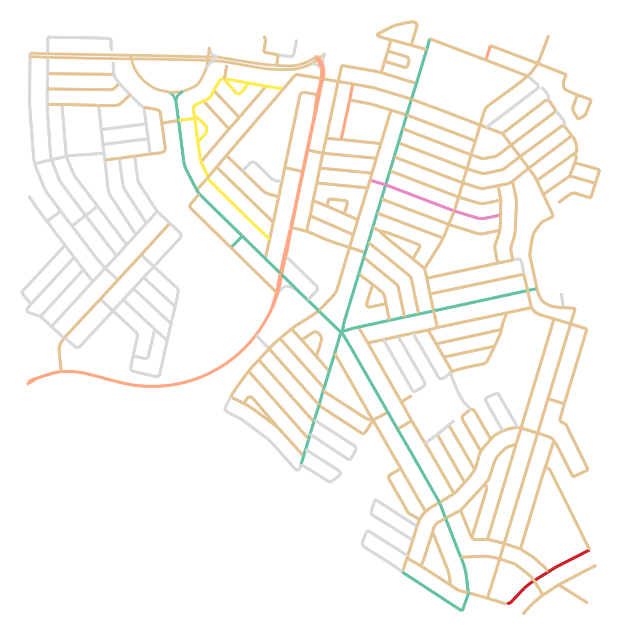

In [310]:
#Plot 
bgcolor = "#ffffff"
map_fig, map_ax = ox.plot_graph(soweto_graph, node_size=0,
                                dpi=100, bgcolor=bgcolor,
                                save=False, edge_color=soweto_gdf["colour"],
                                edge_linewidth=2)
# Can add show=False later 

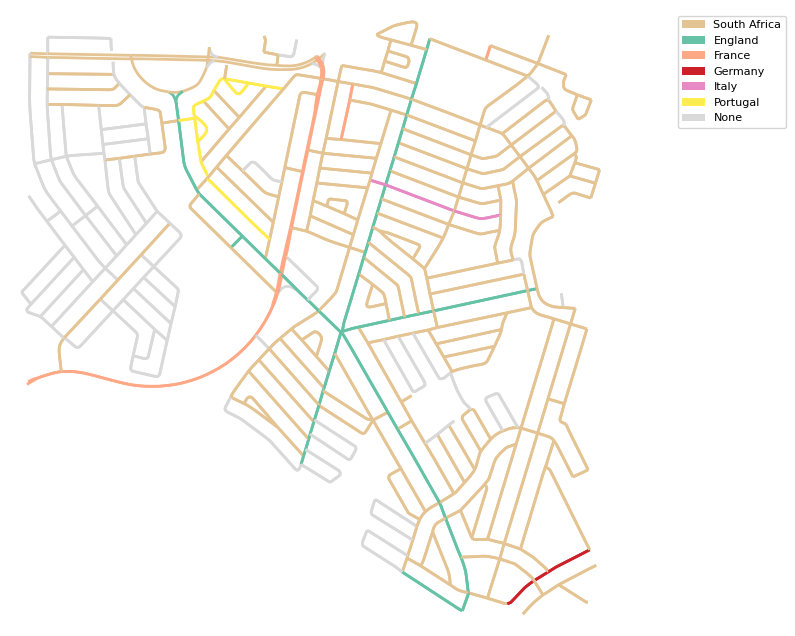

In [311]:
# Custom legend
soweto_origins_in_fig = soweto_gdf["origin"].unique()

soweto_legend_elements = get_custom_legend(soweto_origins_in_fig)

map_ax.legend(handles=soweto_legend_elements, bbox_to_anchor=(1.3, 1), fontsize=8)
map_fig

In [312]:
map_fig.savefig("./output/images/soweto-address-custom-cmap.png", dpi=300, bbox_inches='tight', format="png",
                facecolor=map_fig.get_facecolor(), transparent=False)

# Try folium

In [304]:
soweto_gdf.explore(column="origin", cmap=ORIGIN_CMAP)

# Johannesburg

In [ ]:
johannesburg_graph = ox.graph_from_place('City of Johannesburg, South Africa', network_type="drive")
ox.plot_graph(johannesburg_graph)

In [ ]:
johannesburg_gdf = ox.graph_to_gdfs(johannesburg_graph, nodes=False)
print(len(johannesburg_gdf))
johannesburg_gdf.head()